In [1]:
# 2dbinned stats
import os
import numpy as np
import h5py
from scipy.stats import binned_statistic_2d
import pyproj
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfea
from pyproj import Transformer
# import MisrToolkit as Mtk
from datetime import datetime
import gc
import pandas as pd
from netCDF4 import Dataset
import glob



In [2]:
Globe = ccrs.Globe(ellipse='WGS84', towgs84=[0,0,0,0,0,0,0])
Projection = ccrs.LambertAzimuthalEqualArea(central_longitude=0.0, central_latitude=-90.0, false_easting=0.0, false_northing=0.0, globe=Globe)



import cartopy.feature as cfeature
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
edgecolor='face',
facecolor=cfeature.COLORS['land'])



land = cfeature.COASTLINE

In [3]:
# import numpy as np
# # import pandas as pd
# # import struct
# # import xarray as xr
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
# # import scipy.io
# # from scipy.sparse import spdiags
# # import pickle


# from netCDF4 import Dataset
# import matplotlib.pyplot as plt



# 1) Bathymetry 

In [4]:
#/Users/micheltsamados/Documents/Data/Bathymetry/BedmachineAntarctica/189467428/BedMachineAntarctica_2020-07-15_v02.nc

In [4]:
path='/Users/micheltsamados/Documents/Data/Bathymetry/BedmachineAntarctica/189467428/'
file='BedMachineAntarctica_2020-07-15_v02.nc'
data=Dataset(path+file,"r")
# SIC=np.asarray(data_SIC.variables['sic'])
bathy=data.variables['bed']

In [5]:
data_SIC.variables.keys()

NameError: name 'data_SIC' is not defined

In [6]:
# bathy=data.variables['bed']

In [6]:
x_BA=data.variables['x']
y_BA=data.variables['y']

In [8]:
np.asarray(x_BA)

array([-3333000, -3332500, -3332000, ...,  3332000,  3332500,  3333000],
      dtype=int32)

In [7]:
x_BA.shape

(13333,)

In [8]:
x_BA

<class 'netCDF4._netCDF4.Variable'>
int32 x(x)
    long_name: Cartesian x-coordinate
    standard_name: projection_x_coordinate
    units: meter
unlimited dimensions: 
current shape = (13333,)
filling on, default _FillValue of -2147483647 used

In [9]:
bathy.shape

(13333, 13333)

In [10]:
bathy_mask=np.asarray(bathy).copy()

In [11]:
bathy_mask[bathy_mask==2]=np.nan

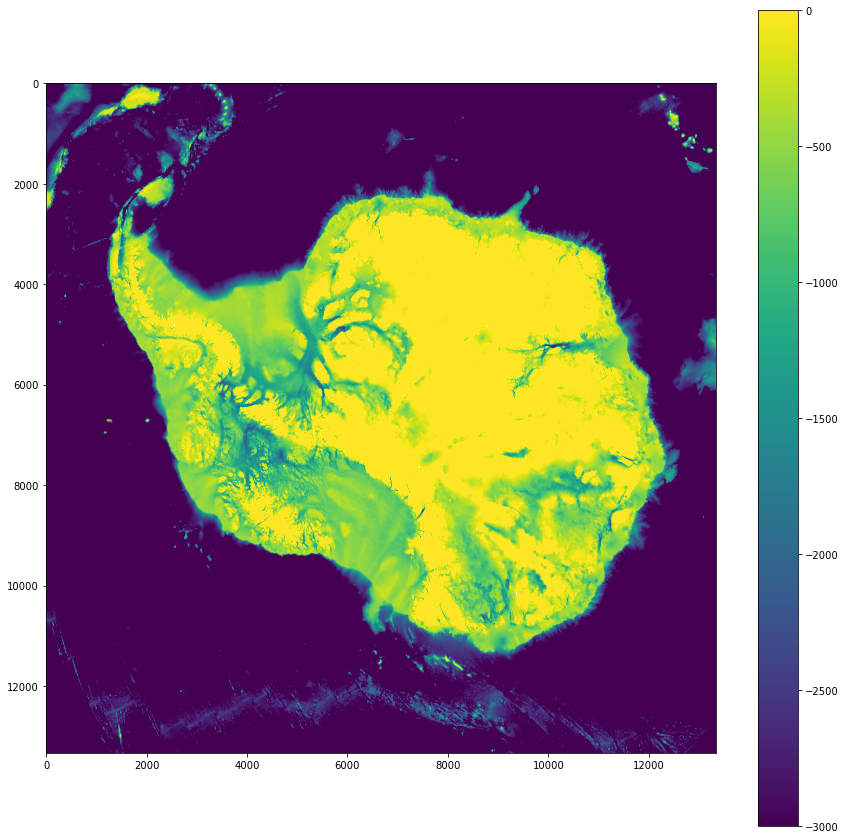

In [12]:
plt.clf()
plt.close()
plt.figure(figsize=(15,15))
plt.imshow(bathy_mask,vmin=-3000,vmax=0)
# plt.pcolor(bathy_mask)
plt.colorbar()

In [13]:
xx_BA, yy_BA = np.meshgrid(x_BA, y_BA)

In [14]:
bathy_mask_grad = np.gradient(bathy_mask)


In [15]:
b_grad=bathy_mask_grad[0]**2.+bathy_mask_grad[1]**2.

In [16]:
b_grad

array([[4.07904243e+01, 3.93028717e+01, 4.27138329e+01, ...,
        9.08314056e+01, 6.11448212e+01, 3.04609280e+01],
       [4.60504150e+01, 4.39813385e+01, 4.50843887e+01, ...,
        1.00746841e+02, 3.57594910e+01, 4.95070076e+00],
       [4.45083122e+01, 4.62938919e+01, 4.76245308e+01, ...,
        1.33577866e+02, 6.13753891e+01, 1.90481644e+01],
       ...,
       [3.47187164e+02, 1.64594452e+02, 2.79535431e+02, ...,
        9.15565681e+00, 2.15936452e-01, 1.72039092e-01],
       [6.20065308e+02, 6.23615417e+02, 9.91562988e+02, ...,
        1.62255383e+01, 2.76071072e+00, 1.18732825e-01],
       [5.38477173e+02, 1.05596863e+03, 1.09991382e+03, ...,
        1.80020580e+01, 8.19183922e+00, 1.85623765e+00]], dtype=float32)

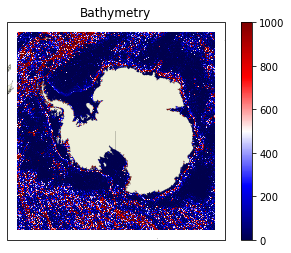

In [19]:
ax = plt.axes(projection = Projection)
plt.title('Bathymetry')
s=5
plt.pcolormesh(xx_BA[::s,::s], yy_BA[::s,::s], b_grad[::s,::s], zorder=0 ,vmin=0, vmax=1000, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
# plt.savefig('Bathymetry_grad.png', dpi = 400)

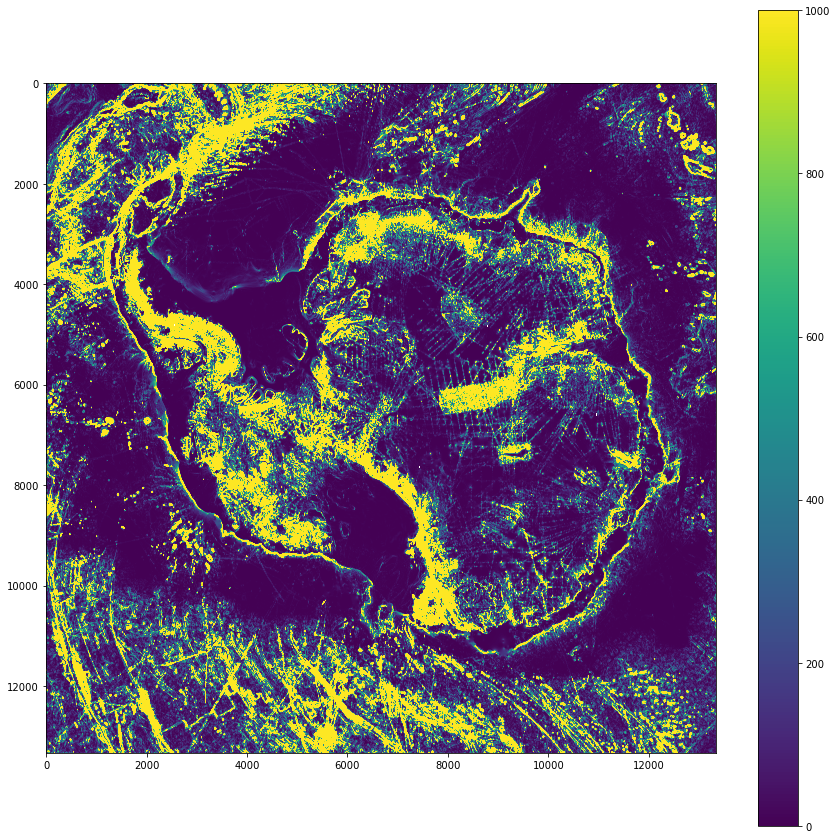

In [18]:
plt.clf()
plt.close()
plt.figure(figsize=(15,15))
plt.imshow(b_grad,vmin=0,vmax=1000)
# plt.pcolor(bathy_mask)
plt.colorbar()

# 2) Roughness

In [20]:
! pwd

/Users/micheltsamados/My Drive/ADMINISTRATION/ESA_ITT_ALBATROS_Tides/PM2_20211201


In [27]:
path2='/Users/micheltsamados/Documents/Data/MISR_roughness/Antarctic/'

In [28]:
# import pickle


# with open(path2+'Roughness Antarctica 2017_32bit.pkl', 'rb') as f:
#     data_roughness = pickle.load(f)

In [29]:
import h5py

def LoadH5(h5name, h5file):
    HDF5 = h5file.get(h5name)
    NP = np.array(HDF5)
    return NP

In [30]:
hf = h5py.File(path2+'AA Roughness 2017 Binned new.hdf', 'r')

In [31]:
lat_edge = LoadH5('GeoLocation/Latitude', hf)
lon_edge = LoadH5('GeoLocation/Longitude', hf)
roughness = LoadH5('Roughness/Roughness_2D_svm', hf)
count = LoadH5('Count/Count_2D_svm', hf)

In [32]:
roughness.shape

(6200, 6200)

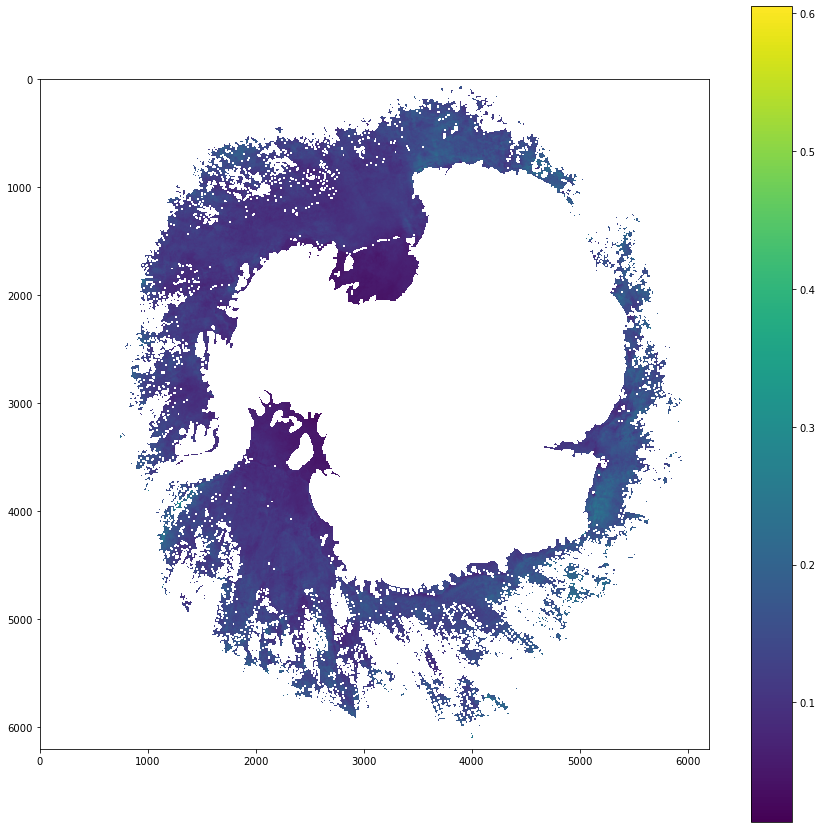

In [33]:
plt.clf()
plt.close()
plt.figure(figsize=(15,15))
plt.imshow(roughness)#,vmin=-3000,vmax=0)
plt.colorbar()

In [34]:
# P = pyproj.Proj(proj='utm', zone=31, ellps='WGS84', preserve_units=True)
P = pyproj.Proj("+proj=laea +lon_0=0 +lat_0=-90 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")
x_edge,y_edge=P(lon_edge,lat_edge)

In [35]:
x_edge.shape

(6201, 6201)

In [36]:
x_edge

array([[-3679460.0528337 , -3678300.99202351, -3677142.30189635, ...,
         3505166.15945213,  3506325.33194575,  3507484.57776468],
       [-3679460.76998328, -3678300.96145595, -3677142.01617834, ...,
         3505165.54889541,  3506325.15944307,  3507484.64695252],
       [-3679460.40255446, -3678301.44198533, -3677141.74925408, ...,
         3505166.24049736,  3506325.29493117,  3507484.42262011],
       ...,
       [-3679460.15629978, -3678301.23767437, -3677141.87091239, ...,
         3505166.00705025,  3506325.06718696,  3507484.21767005],
       [-3679460.3534445 , -3678301.11243036, -3677141.94410659, ...,
         3505166.01079191,  3506325.15095369,  3507484.38135925],
       [-3679460.29390541, -3678300.98230936, -3677141.74342368, ...,
         3505165.75478264,  3506324.97497104,  3507484.28530065]])

In [37]:
import numpy.ma as ma
XX = ma.array(x_edge,mask=np.isnan(x_edge))
YY = ma.array(y_edge,mask=np.isnan(y_edge))
roughness_m = ma.array(roughness,mask=np.isnan(roughness))


In [38]:
roughness.shape

(6200, 6200)

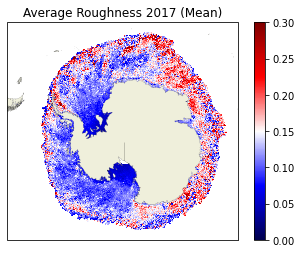

In [39]:
ax = plt.axes(projection = Projection)
plt.title('Average Roughness 2017 (Mean)')
s=5
plt.pcolormesh(XX[::s,::s], YY[::s,::s], roughness_m[::s,::s], zorder=0 ,vmin=0, vmax=0.3, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
# plt.savefig('AA_2017_Roughness_Mean.png', dpi = 400)



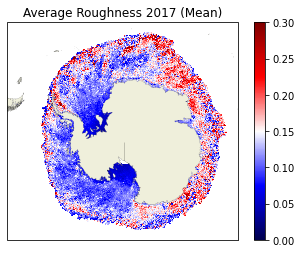

In [40]:
ax = plt.axes(projection = Projection)
plt.title('Average Roughness 2017 (Mean)')
s=5
plt.pcolormesh(XX[::s,::s], YY[::s,::s], roughness_m[::s,::s], zorder=0 ,vmin=0, vmax=0.3, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
# plt.savefig('AA_2017_Roughness_Mean.png', dpi = 1200)

In [56]:
! pip3 install mapnik

ERROR: Could not find a version that satisfies the requirement mapnik
ERROR: No matching distribution found for mapnik


In [ ]:
+proj=laea +lat_0=-90 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 



# 3) Tides

In [41]:
! ls /Users/micheltsamados/Documents/Data/Tides

Tide_gauge_time_series
meanvelocity_FES2014_Antarctica_Sept2017.nc
meanvelocity_FES2014_Arctic_March2019.nc
tidal_dissipation_diags


In [42]:
path_tides='/Users/micheltsamados/Documents/Data/Tides/'
file_AA='meanvelocity_FES2014_Antarctica_Sept2017.nc'
# file_A=path_tides+'meanvelocity_FES2014_Arctic_March2019.nc'


data_tides=Dataset(path_tides+file_AA,"r")
# SIC=np.asarray(data_SIC.variables['sic'])
# bathy=data.variables['bed']

In [43]:
data_tides.variables.keys()

dict_keys(['longitude', 'latitude', 'MeanVelocity'])

In [44]:
tides=data_tides.variables['MeanVelocity']
tides_lon=data_tides.variables['longitude']
tides_lat=data_tides.variables['latitude']

In [45]:
print(tides_lon.shape)
tides.shape

(5761,)


(5761, 800)

In [46]:
tides_lon_g, tides_lat_g = np.meshgrid(np.asarray(tides_lon), np.asarray(tides_lat))

In [47]:
x_tides,y_tides=P(tides_lon_g,tides_lat_g)

In [48]:
np.asarray(tides_lon_g).shape

(800, 5761)

In [49]:
tides.shape

(5761, 800)

/Users/micheltsamados/miniconda3/envs/icesat2020/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


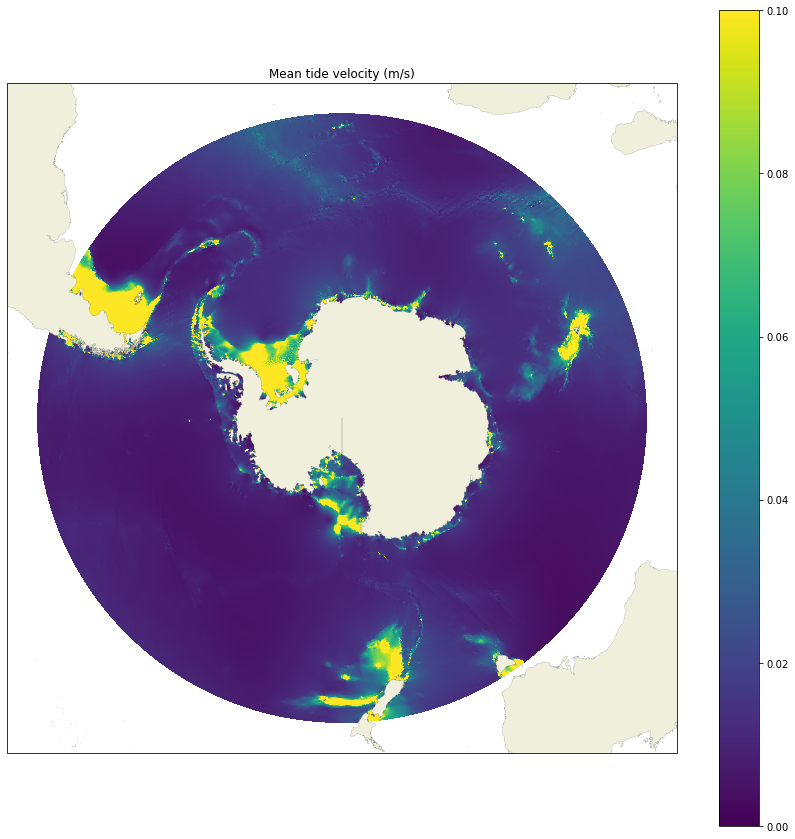

In [50]:
plt.figure(figsize=(15,15))

ax = plt.axes(projection = Projection)
plt.title('Mean tide velocity (m/s)')
s=2
plt.pcolormesh(x_tides[::s,::s], y_tides[::s,::s], tides[::s,::s].T, zorder=0 ,vmin=0, vmax=0.1)#, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
# plt.savefig('MeanVelocityTides.png', dpi = 400)



# Tidal mixing 

# Tidal mixing old 

In [50]:
! ls /Users/micheltsamados/Documents/Data/Tides/tidal_dissipation_diags/Antarctica

bottom_friction_row-2017.01.huv.nc.gz vertical_excursion-2017.01.huv.nc.gz
bottom_friction_row-2017.02.huv.nc.gz vertical_excursion-2017.02.huv.nc.gz
bottom_friction_row-2017.03.huv.nc.gz vertical_excursion-2017.03.huv.nc.gz
bottom_friction_row-2017.04.huv.nc.gz vertical_excursion-2017.04.huv.nc.gz
bottom_friction_row-2017.05.huv.nc.gz vertical_excursion-2017.05.huv.nc.gz
bottom_friction_row-2017.06.huv.nc.gz vertical_excursion-2017.06.huv.nc.gz
bottom_friction_row-2017.07.huv.nc.gz vertical_excursion-2017.07.huv.nc.gz
bottom_friction_row-2017.08.huv.nc.gz vertical_excursion-2017.08.huv.nc.gz
bottom_friction_row-2017.09.huv.nc.gz vertical_excursion-2017.09.huv.nc.gz
bottom_friction_row-2017.10.huv.nc.gz vertical_excursion-2017.10.huv.nc.gz
bottom_friction_row-2017.11.huv.nc.gz vertical_excursion-2017.11.huv.nc.gz
bottom_friction_row-2017.12.huv.nc.gz vertical_excursion-2017.12.huv.nc.gz
bottom_friction_row-2018.01.huv.nc.gz vertical_excursion-2018.01.huv.nc.gz
bottom_friction_row-2018.

In [51]:
! ls /Users/micheltsamados/Documents/Data/MISR_roughness/Antarctic/

AA Roughness 2017 Binned new.hdf    Roughness Antarctica 2017_32bit.pkl
AA Roughness 2017 Binned.hdf


In [ ]:
vertical_excursion-2017.09.huv.nc

In [53]:
path_tides='/Users/micheltsamados/Documents/Data/Tides/tidal_dissipation_diags/Antarctica/'
file_AA='vertical_excursion-2017.09.huv.nc'

data_mixing=Dataset(path_tides+file_AA,"r")

In [54]:
data_mixing.variables.keys()

dict_keys(['lon', 'lat', 'time', 'vertical_excursion'])

In [55]:
vertical_excursion=data_tides.variables['vertical_excursion']
vertical_excursion_lon=data_tides.variables['lon']
vertical_excursion_lat=data_tides.variables['lat']

In [56]:
vertical_excursion.shape

(30, 751, 5401)

In [60]:
vertical_excursion_lat.shape

(751,)

In [58]:
vertical_excursion_lon_g, vertical_excursion_lat_g = np.meshgrid(np.asarray(vertical_excursion_lon), np.asarray(vertical_excursion_lat))

In [59]:
vertical_excursion_lon_g.shape

(751, 5401)

In [61]:
x_vert,y_vert=P(vertical_excursion_lon_g,vertical_excursion_lat_g)

In [63]:
x_vert.shape

(751, 5401)

In [68]:
vertical_excursion[0].T.shape

(5401, 751)

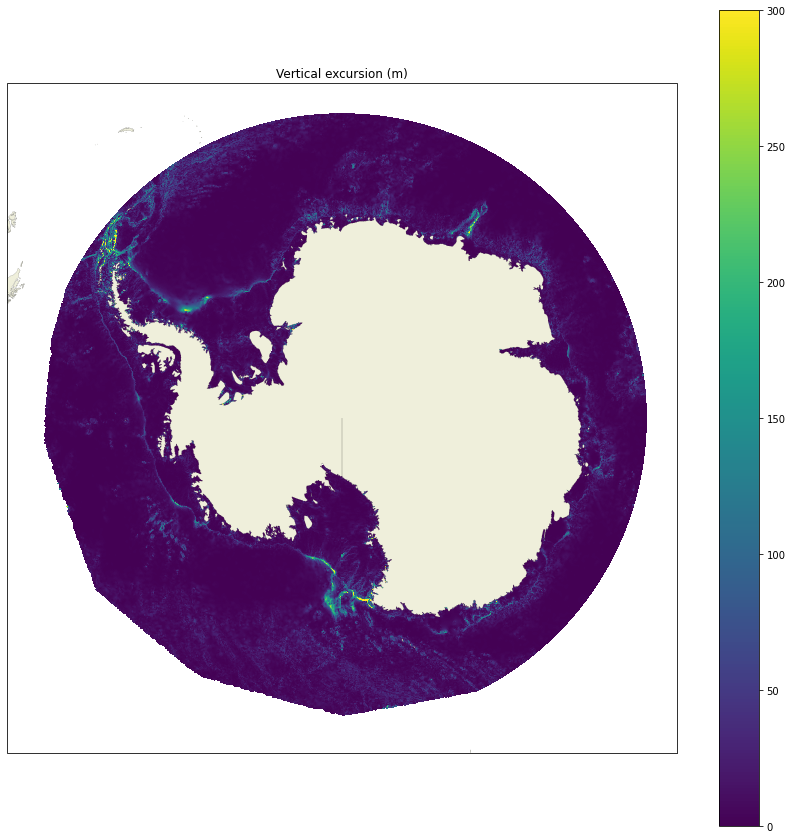

In [96]:
plt.figure(figsize=(15,15))

ax = plt.axes(projection = Projection)
plt.title('Vertical excursion (m)')
s=1
plt.pcolormesh(x_vert[::s,::s], y_vert[::s,::s], vertical_excursion[0,::s,::s], zorder=0 ,vmin=0, vmax=300)#, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
plt.savefig('VerticalExcursion_20170901.png', dpi = 400)




In [ ]:
# Loop over days 

In [74]:
path_tides='/Users/micheltsamados/Documents/Data/Tides/tidal_dissipation_diags/Antarctica/'
file_AA='vertical_excursion-2017.09.huv.nc'

data_mixing=Dataset(path_tides+file_AA,"r")

In [75]:
vertical_excursion=data_tides.variables['vertical_excursion']



<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

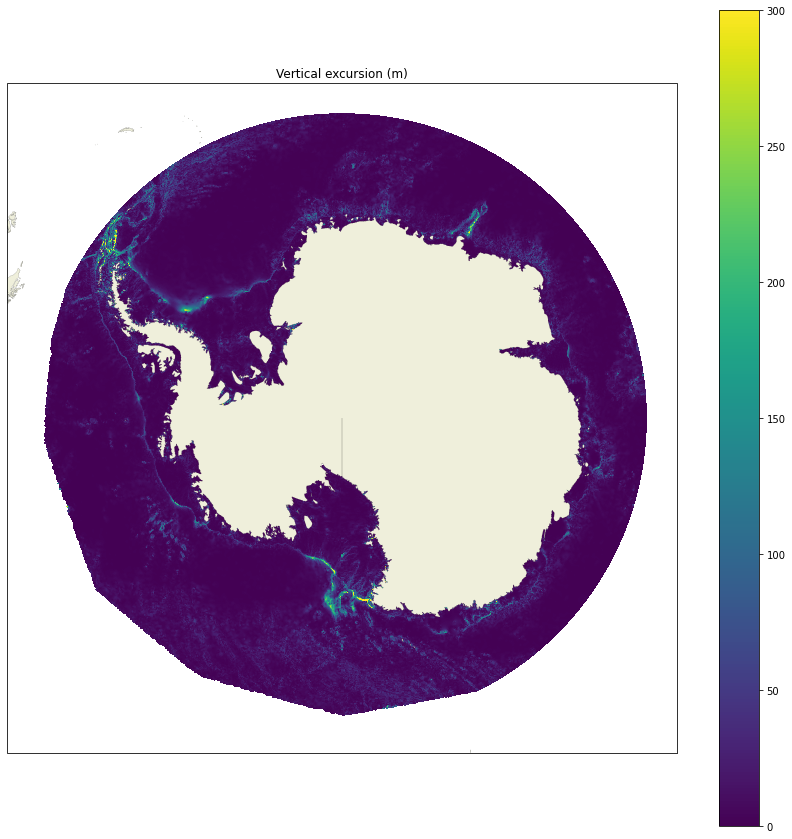

In [97]:
file_AA='vertical_excursion-2017.10.huv.nc'
for d in range(15):
    day_str = '%02d' % (d+1)
    data_mixing=Dataset(path_tides+file_AA,"r")
    vertical_excursion=data_tides.variables['vertical_excursion']
    plt.clf()
    plt.figure(figsize=(15,15))
    ax = plt.axes(projection = Projection)
    plt.title('Vertical excursion (m)')
    s=1
    plt.pcolormesh(x_vert[::s,::s], y_vert[::s,::s], vertical_excursion[d,::s,::s], zorder=0 ,vmin=0, vmax=300)#, cmap='seismic')
    ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
    plt.colorbar()
    plt.savefig('VerticalExcursion_201710'+day_str+'.png', dpi = 200)


In [ ]:
# Save video

In [80]:
pip install moviepy

     |████████████████████████████████| 388 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 22.5 MB 10.4 MB/s eta 0:00:01
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110724 sha256=8a3e3fe84bfd57c79256890824f64b35bc6831108bccc0c6d3e9f3420ec20b77
  Stored in directory: /Users/micheltsamados/Library/Caches/pip/wheels/56/dc/2b/9cd600d483c04af3353d66623056fc03faed76b7518faae4df
  Created wheel for proglog: filename=proglog-0.1.9-py3-none-any.whl size=6147 sha256=36f846c6eee4c3c34d4fa4adfc27624c5d5bd3931ecb4e4f84a1e69f43960185
  Stored in directory: /Users/micheltsamados/Library/Caches/pip/wheels/12/36/1f/dc61e6ac10781d63cf6fa045eb09fa613a667384e12cb6e6e0
Successfully built moviepy proglog
Note: you may need to restart the kernel to use updated packages.


In [98]:
# turn jpegs into mp4 video

from moviepy.editor import *
f_in = './VerticalExcursion_201710'+'*.png'
f_out ="./VericalExcursion_201710.mp4"



files = [f for f in sorted(glob.glob(f_in))]
clip = ImageSequenceClip(files, fps = 10)
clip.write_videofile(f_out)

t:  12%|█▎        | 2/16 [00:00<00:00, 15.07it/s, now=None]

Moviepy - Building video ./VericalExcursion_201710.mp4.
Moviepy - Writing video ./VericalExcursion_201710.mp4



Moviepy - Done !
Moviepy - video ready ./VericalExcursion_201710.mp4


In [93]:
files

['./VerticalExcursion_20170901.png',
 './VerticalExcursion_20170902.png',
 './VerticalExcursion_20170903.png',
 './VerticalExcursion_20170904.png',
 './VerticalExcursion_20170905.png',
 './VerticalExcursion_20170906.png',
 './VerticalExcursion_20170907.png',
 './VerticalExcursion_20170908.png',
 './VerticalExcursion_20170909.png',
 './VerticalExcursion_20170910.png',
 './VerticalExcursion_20170911.png',
 './VerticalExcursion_20170912.png',
 './VerticalExcursion_20170913.png',
 './VerticalExcursion_20170914.png',
 './VerticalExcursion_20170915.png',
 './VerticalExcursion_20170916.png',
 './VerticalExcursion_20170917.png',
 './VerticalExcursion_20170918.png',
 './VerticalExcursion_20170919.png',
 './VerticalExcursion_20170920.png',
 './VerticalExcursion_20170921.png',
 './VerticalExcursion_20170922.png',
 './VerticalExcursion_20170923.png',
 './VerticalExcursion_20170924.png',
 './VerticalExcursion_20170925.png',
 './VerticalExcursion_20170926.png',
 './VerticalExcursion_20170927.png',
 